In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('OSX_DS_assignment.csv')
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir


In [3]:
data.shape

(103322, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103322 entries, 0 to 103321
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_name           79191 non-null   object 
 1   country             103283 non-null  object 
 2   review_title        103322 non-null  object 
 3   review_description  103322 non-null  object 
 4   designation         73686 non-null   object 
 5   points              103322 non-null  int64  
 6   price               96359 non-null   float64
 7   province            103283 non-null  object 
 8   region_1            87254 non-null   object 
 9   region_2            44863 non-null   object 
 10  winery              103322 non-null  object 
 11  variety             103322 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ MB


In [22]:
data.isnull().sum()

country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

In [6]:
data = data.drop('user_name', axis=1)

In [7]:
data_new =  data[['review_title', 'review_description', 'points', 'winery', 'variety']]
data_new.head()

,review_title,review_description,points,winery,variety
0,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",87,Nicosia,White Blend
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",87,Quinta dos Avidagos,Portuguese Red
2,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",87,Rainstorm,Pinot Gris
3,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",87,St. Julian,Riesling
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",87,Sweet Cheeks,Pinot Noir


In [8]:
data_new.isnull().sum()

review_title          0
review_description    0
points                0
winery                0
variety               0
dtype: int64

In [9]:
for i in data.columns:
    distinct = data[i].unique()
    print(i,":",distinct)

country : ['Italy' 'Portugal' 'US' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Spain'
 'Romania' 'Greece' 'Mexico' 'Hungary' 'Slovenia' nan 'Luxembourg'
 'England' 'Uruguay' 'Lebanon' 'Canada' 'Brazil' 'Morocco'
 'Czech Republic' 'Bulgaria' 'Cyprus' 'Turkey' 'Moldova' 'Croatia' 'Peru'
 'Georgia' 'Ukraine' 'Switzerland' 'Slovakia' 'Serbia' 'India' 'Macedonia'
 'Armenia']
review_title : ['Nicosia 2013 Vulkà Bianco  (Etna)'
 'Quinta dos Avidagos 2011 Avidagos Red (Douro)'
 'Rainstorm 2013 Pinot Gris (Willamette Valley)' ...
 'Domaine Gresser 2013 Kritt Gewurztraminer (Alsace)'
 'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)'
 'Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)']
review_description : ["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."
 "This is ripe and fruity, a wine th

Country wise distibution of Points of wine


c:\Users\Ritesh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


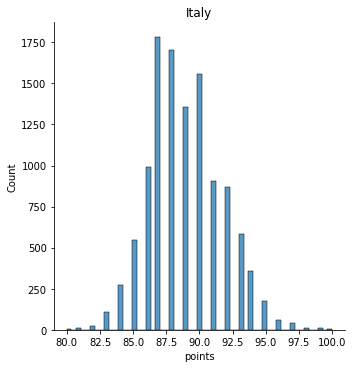

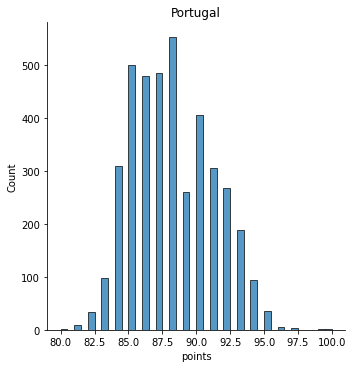

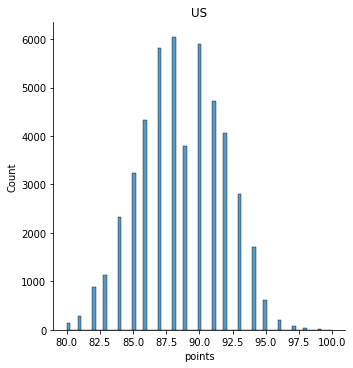

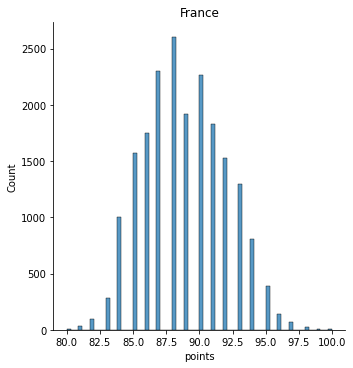

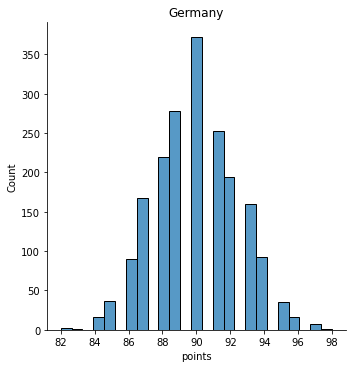

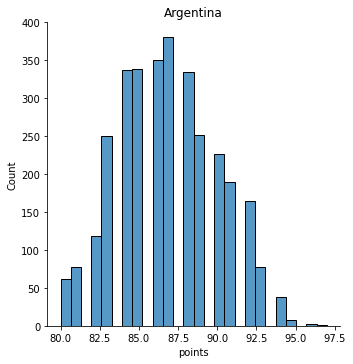

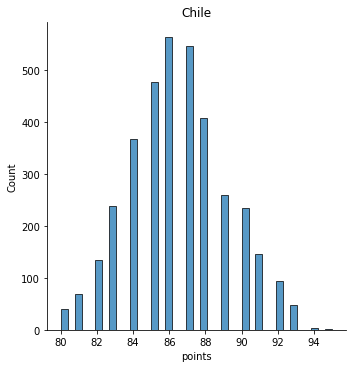

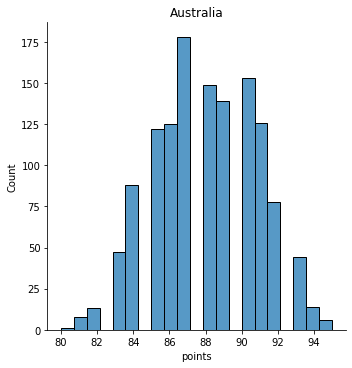

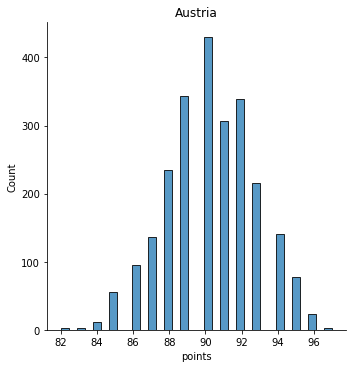

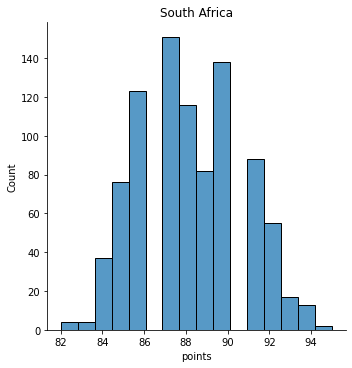

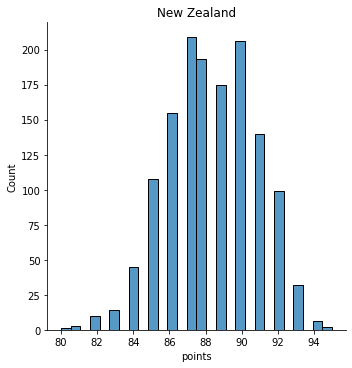

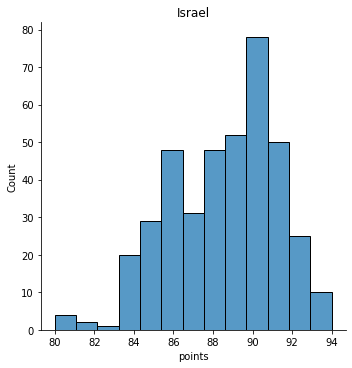

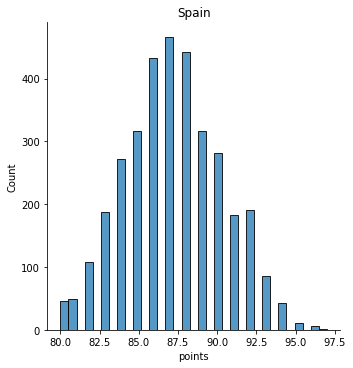

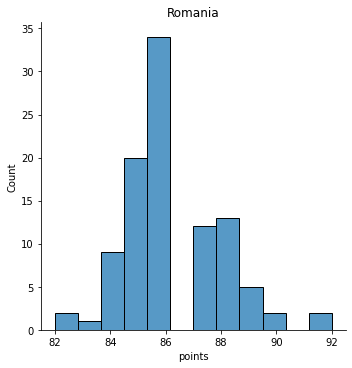

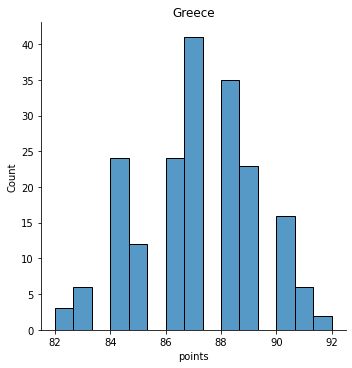

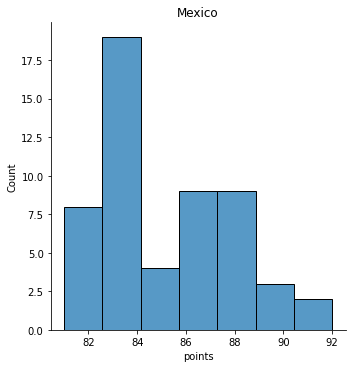

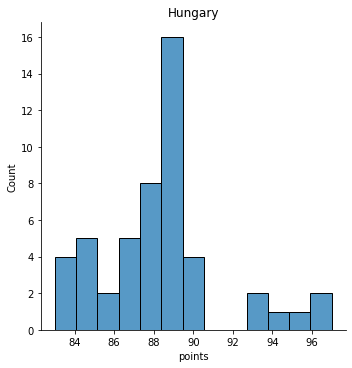

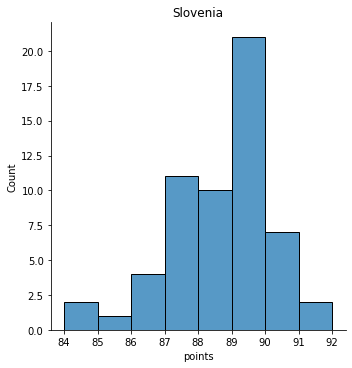

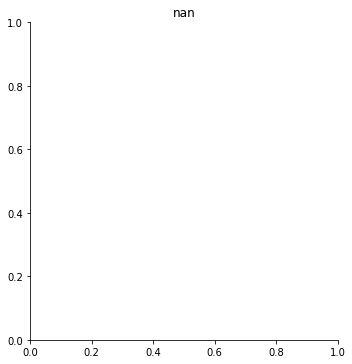

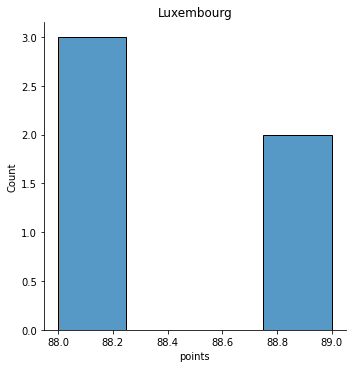

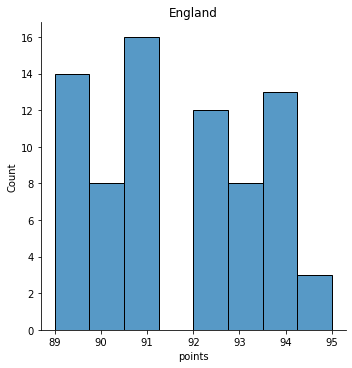

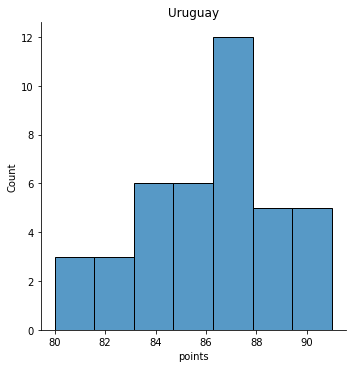

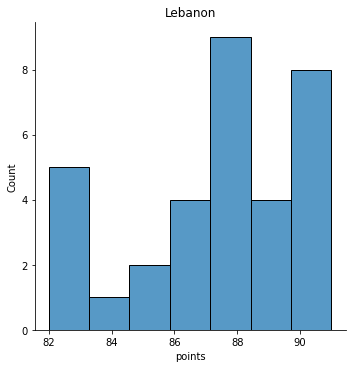

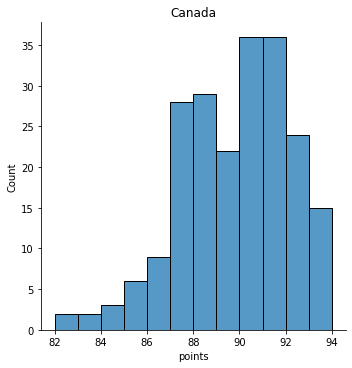

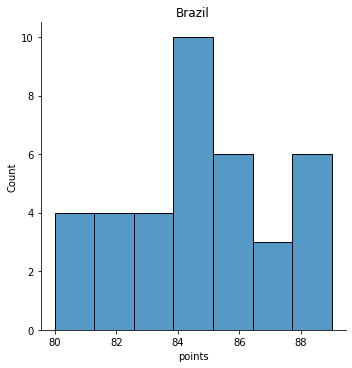

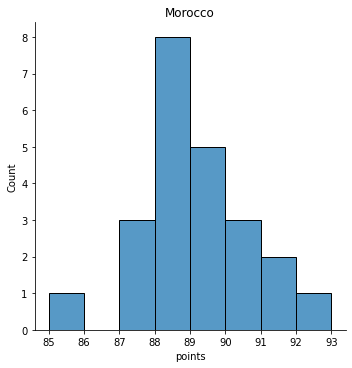

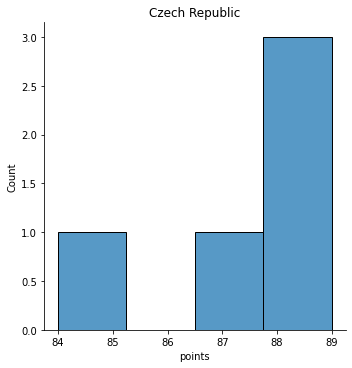

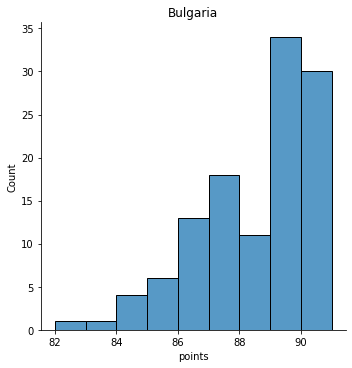

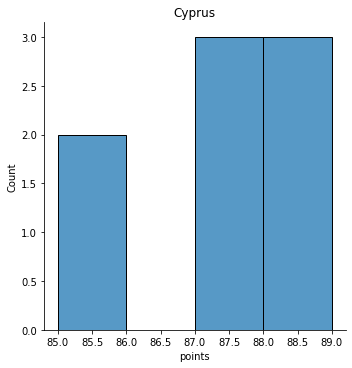

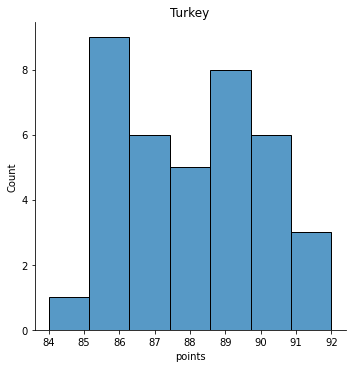

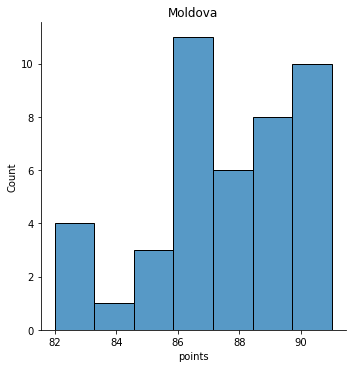

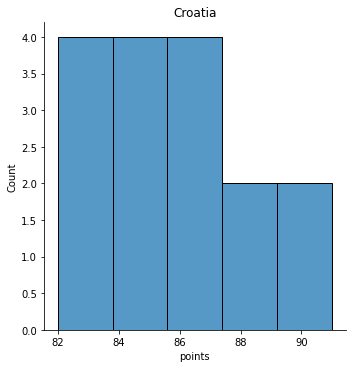

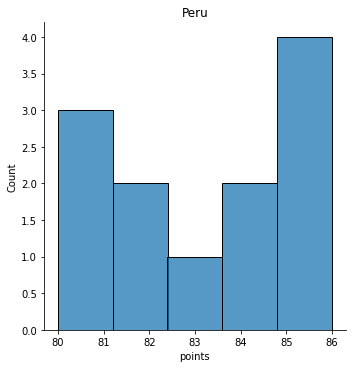

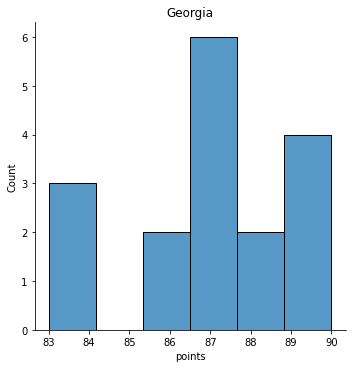

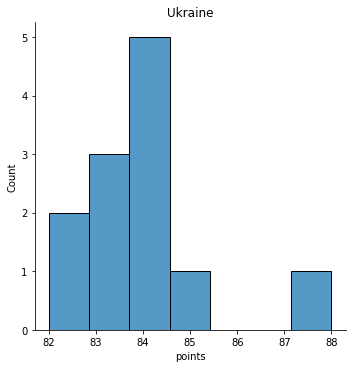

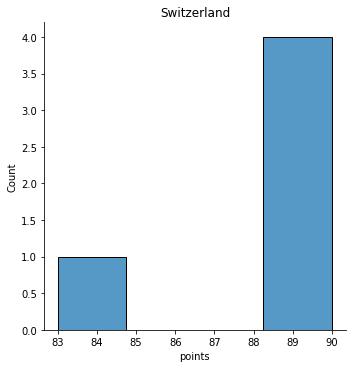

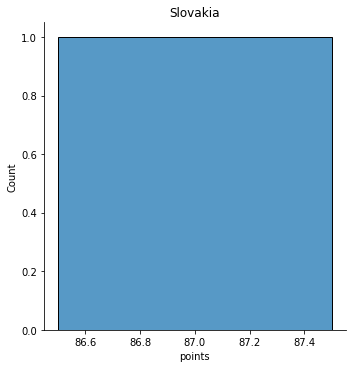

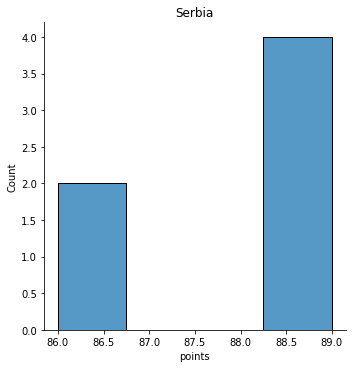

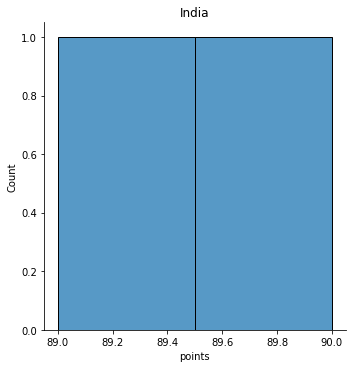

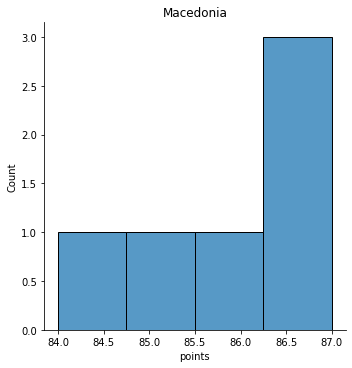

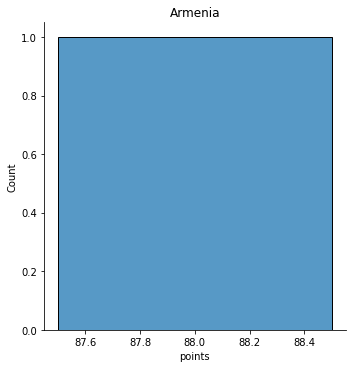

In [10]:
print("Country wise distibution of Points of wine")
country_filter = data.dropna(subset=['country'])
for i in data['country'].unique():
    uc = country_filter[country_filter['country'] == i]
    if(data['points'].dtype == 'int64'): 
        sns.displot(x = uc["points"])
        plt.title(i)

In [11]:
data.groupby('country')['points'].mean().sort_values(ascending=False)

country
England           91.581081
Austria           90.312060
Germany           89.970165
India             89.500000
Canada            89.311321
Italy             88.943975
France            88.871363
Morocco           88.695652
US                88.621830
Hungary           88.440000
Israel            88.424623
Luxembourg        88.400000
New Zealand       88.308298
South Africa      88.222958
Slovenia          88.206897
Turkey            88.078947
Bulgaria          88.076271
Serbia            88.000000
Switzerland       88.000000
Armenia           88.000000
Portugal          87.992075
Australia         87.967467
Moldova           87.488372
Lebanon           87.484848
Czech Republic    87.400000
Spain             87.228912
Georgia           87.058824
Greece            87.020833
Cyprus            87.000000
Slovakia          87.000000
Argentina         86.809613
Chile             86.468595
Romania           86.240000
Uruguay           86.025000
Macedonia         86.000000
Croatia     

Text(0.5, 1.0, 'Number of each variety produced')

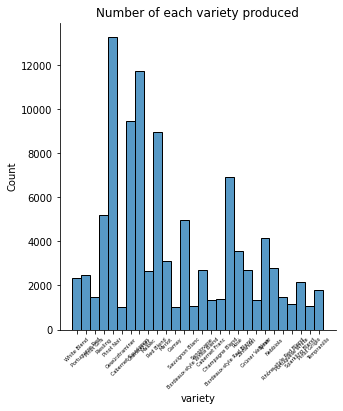

In [12]:
sns.displot(x = data["variety"])
plt.xticks(rotation=45, fontsize = 5)
plt.title('Number of each variety produced')

In [13]:
variety_counts = data['variety'].value_counts()
most_common_variety = variety_counts.idxmax()
print("The most common variety is: ", most_common_variety)

The most common variety is:  Pinot Noir


Text(0.5, 1.0, 'Number of Pinot Noir wines produced by country')

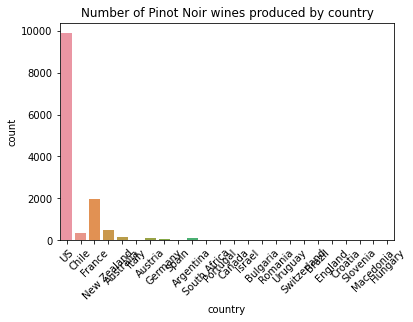

In [14]:
pinot_noir_data = data[data['variety'] == 'Pinot Noir']
sns.countplot(x='country', data=pinot_noir_data)
plt.xticks(rotation=45, fontsize = 10)
plt.title('Number of Pinot Noir wines produced by country')

In [15]:
pinot_noir = data[data['variety'] == 'Pinot Noir']
grouped = data.groupby(['country', 'variety']).size().reset_index(name='count')
sorted_grouped = grouped.sort_values(by='count', ascending=False)
most_produced_country = sorted_grouped.iloc[0]['country']
print("Pinot Noir is produced most by", most_produced_country)

Pinot Noir is produced most by US


Text(0, 0.5, 'Price')

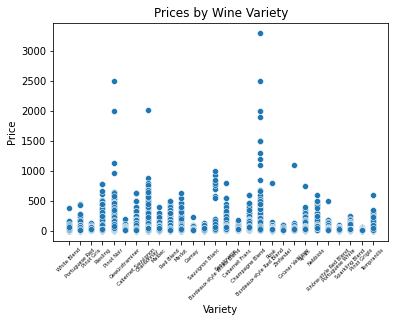

In [16]:
sns.scatterplot(x='variety', y='price', data=data)

# set the x-label rotation to 45 degrees for better readability
plt.xticks(rotation=45, fontsize = 5)

# set the plot title and labels
plt.title('Prices by Wine Variety')
plt.xlabel('Variety')
plt.ylabel('Price')

In [17]:
data.groupby('variety')['price'].mean().sort_values(ascending= False)

variety
Champagne Blend               70.744839
Nebbiolo                      65.609610
Cabernet Sauvignon            47.940017
Pinot Noir                    47.528897
Bordeaux-style Red Blend      47.210861
Sangiovese                    45.279344
Syrah                         39.137788
Red Blend                     35.881194
Rhône-style Red Blend         34.925267
Cabernet Franc                34.836782
Bordeaux-style White Blend    34.720863
Chardonnay                    34.522022
Riesling                      32.000402
Tempranillo                   31.150922
Malbec                        29.926726
Sparkling Blend               29.611248
Merlot                        29.543436
Zinfandel                     29.492245
Grüner Veltliner              27.780786
Gewürztraminer                26.283473
Portuguese Red                24.819217
White Blend                   23.240792
Pinot Gris                    23.074047
Gamay                         20.699761
Sauvignon Blanc               20

Text(0, 0.5, 'Price')

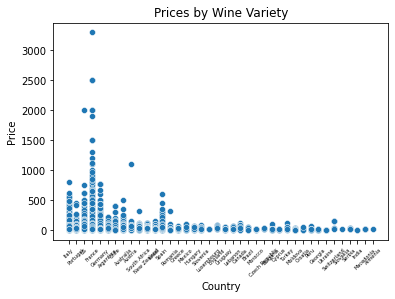

In [31]:
sns.scatterplot(x='country', y='price', data=data)

# set the x-label rotation to 45 degrees for better readability
plt.xticks(rotation=45, fontsize = 5)

# set the plot title and labels
plt.title('Prices by Wine Variety')
plt.xlabel('Country')
plt.ylabel('Price')

In [32]:
data.groupby('country')['price'].mean().sort_values(ascending= False)

country
Switzerland       107.800000
England            51.681159
Italy              46.222604
France             42.903059
Germany            42.608285
US                 37.486192
Canada             33.971292
Israel             32.657963
Hungary            31.460000
Austria            31.289370
Serbia             31.000000
Lebanon            30.424242
Australia          29.071259
Mexico             28.944444
Turkey             28.289474
Spain              28.164800
Czech Republic     27.200000
New Zealand        26.958793
Brazil             25.606061
South Africa       25.511323
Slovenia           25.461538
Argentina          25.270544
Uruguay            25.000000
Croatia            23.928571
Greece             23.904255
Luxembourg         23.600000
Portugal           21.437041
Chile              20.622352
Moldova            18.488372
Peru               18.416667
Morocco            18.000000
Slovakia           16.000000
Romania            15.860000
Cyprus             15.250000
Macedo

Text(0, 0.5, 'Price')

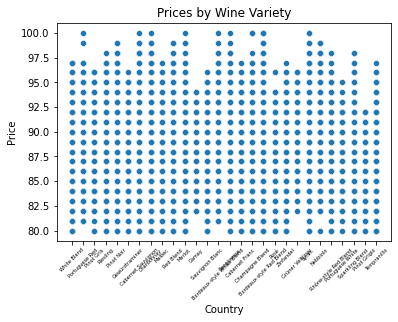

In [35]:
sns.scatterplot(x='variety', y='points', data=data)

# set the x-label rotation to 45 degrees for better readability
plt.xticks(rotation=45, fontsize = 5)

# set the plot title and labels
plt.title('Prices by Wine Variety')
plt.xlabel('Country')
plt.ylabel('Price')

In [36]:
data.groupby('variety')['points'].mean().sort_values(ascending= False)

variety
Nebbiolo                      90.251070
Grüner Veltliner              89.980669
Champagne Blend               89.663324
Riesling                      89.450183
Pinot Noir                    89.411468
Syrah                         89.286577
Rhône-style Red Blend         89.153637
Bordeaux-style Red Blend      89.106435
Portuguese Red                88.810624
Bordeaux-style White Blend    88.690432
Cabernet Sauvignon            88.607580
Gewürztraminer                88.590909
Sangiovese                    88.550794
Pinot Gris                    88.496220
Red Blend                     88.380282
Chardonnay                    88.340083
Cabernet Franc                88.150776
Sparkling Blend               88.045053
Gamay                         88.033171
Malbec                        87.983032
Zinfandel                     87.828666
Tempranillo                   87.514365
Sauvignon Blanc               87.429636
White Blend                   87.352966
Merlot                        87

Text(0, 0.5, 'Points/ Price')

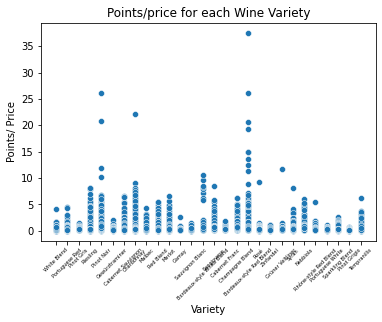

In [49]:
data['point_price_ratio'] = data['price'] / data['points']
sns.scatterplot(x='variety', y='point_price_ratio', data=data)
plt.xticks(rotation=45, fontsize = 5)
plt.title('Points/price for each Wine Variety')
plt.xlabel('Variety')
plt.ylabel('Points/ Price')

In [50]:
data.groupby('variety')['point_price_ratio'].mean().sort_values(ascending= True)

variety
Portuguese White              0.174845
Pinot Grigio                  0.190904
Rosé                          0.211765
Sauvignon Blanc               0.229839
Gamay                         0.233501
Pinot Gris                    0.258519
White Blend                   0.263685
Portuguese Red                0.274076
Gewürztraminer                0.293727
Grüner Veltliner              0.305946
Sparkling Blend               0.332270
Merlot                        0.333678
Zinfandel                     0.334358
Malbec                        0.335044
Tempranillo                   0.349404
Riesling                      0.352200
Bordeaux-style White Blend    0.380217
Chardonnay                    0.384145
Rhône-style Red Blend         0.387837
Cabernet Franc                0.392463
Red Blend                     0.401474
Syrah                         0.434691
Sangiovese                    0.504402
Bordeaux-style Red Blend      0.520144
Pinot Noir                    0.525295
Cabernet Sauvigno